In [1]:
## Breast Cancer LASSO Exploration
## Prepare workspace
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
X = loadmat("BreastCancer.mat")['X']
y = loadmat("BreastCancer.mat")['y']


In [2]:
def ista_solve_hot( A, d, la_array ):
    # ista_solve_hot: Iterative soft-thresholding for multiple values of
    # lambda with hot start for each case - the converged value for the previous
    # value of lambda is used as an initial condition for the current lambda.
    # this function solves the minimization problem
    # Minimize |Ax-d|_2^2 + lambda*|x|_1 (Lasso regression)
    # using iterative soft-thresholding.
    max_iter = 10**4
    tol = 10**(-3)
    tau = 1/np.linalg.norm(A,2)**2
    n = A.shape[1]
    w = np.zeros((n,1))
    num_lam = len(la_array)
    X = np.zeros((n, num_lam))
    for i, each_lambda in enumerate(la_array):
        for j in range(max_iter):
            z = w - tau*(A.T@(A@w-d))
            w_old = w
            w = np.sign(z) * np.clip(np.abs(z)-tau*each_lambda/2, 0, np.inf)
            X[:, i:i+1] = w
            if np.linalg.norm(w - w_old) < tol:
                break
    return X

In [3]:
weights = ista_solve_hot(X[0:100], y[0:100], np.logspace(-6,2))

In [4]:
residual_norm =  np.linalg.norm(X[:100] @ weights - y[:100], axis=0)
l1_norms = np.linalg.norm(weights, ord=1, axis=0)

<function matplotlib.pyplot.show(close=None, block=None)>

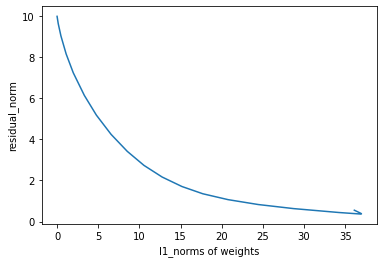

In [18]:
plt.plot(l1_norms, residual_norm)

plt.xlabel('l1_norms of weights')
plt.ylabel('residual_norm')
plt.show

As lambda increases, the weight vector becomes sparser but the residual norm increases, indicating worse data fitting.
 As lambda decreases, the weight vector becomes less sparse but the residual norm decreases, indicating better data fitting.

In [6]:
# Calculate the sparsity of the weight vector for each lambda value
sparsity = np.count_nonzero(np.abs(weights) > 1e-6, axis=0)

In [7]:
# Make predictions using the weight vector and training data
y_pred = np.sign(X[:100] @ weights)

In [8]:
# Calculate the error rate for each lambda value
error_rate = np.sum(y_pred != y[:100], axis=0) / y[:100].size

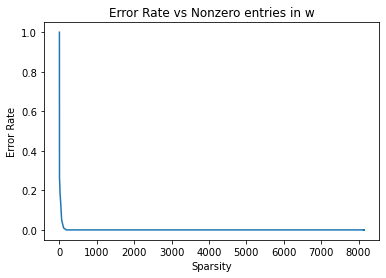

In [9]:
plt.plot(sparsity, error_rate)
plt.xlabel('Sparsity')
plt.ylabel('Error Rate')
plt.title('Error Rate vs Nonzero entries in w')
plt.show()

As the number of nonzero entries increases our error rate decreases however we can tell that there are very few genes that can actually acount for our breast cancer prediction

In [10]:
residual_norm_2 =  np.linalg.norm(X[100:] @ weights - y[100:], axis=0)
l1_norms = np.linalg.norm(weights, ord=1, axis=0)

<function matplotlib.pyplot.show(close=None, block=None)>

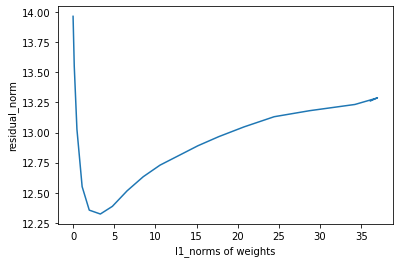

In [19]:
plt.plot(l1_norms, residual_norm_2)

plt.xlabel('l1_norms of weights')
plt.ylabel('residual_norm')

plt.show

In [12]:
y_pred_2 = np.sign(X[100:] @ weights)

In [13]:
error_rate_2 = np.sum(y_pred_2 != y[100:], axis=0) / y[100:].size

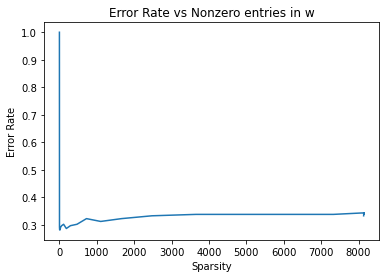

In [14]:
plt.plot(sparsity, error_rate_2)
plt.xlabel('Sparsity')
plt.ylabel('Error Rate')
plt.title('Error Rate vs Nonzero entries in w')
plt.show()

In [20]:
#So we can tell that there are very few genes that contribute to an accurate prediction of breast cancer. 